In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (inner merge)
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice.
number_of_mice = mouse_study["Mouse ID"].value_counts()
number_of_mice


g989    13
y163    10
u196    10
a251    10
a444    10
        ..
h428     1
b447     1
x226     1
v199     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = mouse_study[mouse_study.duplicated()]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data = mouse_study.loc[mouse_study["Mouse ID"]!= "g989"]
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Checking the number of mice in the clean DataFrame.
mouse_data["Mouse ID"].value_counts()

y163    10
t198    10
e213    10
c766    10
o331    10
        ..
x226     1
v199     1
t573     1
l872     1
d133     1
Name: Mouse ID, Length: 248, dtype: int64

In [30]:
mouse_data["Drug Regimen"].value_counts() 

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# This method is the most straighforward, creating multiple series and putting them all together at the end.
# create empty list
tv_means=[]
tv_medians = []
tv_sd = []
tv_var = []
tv_sem = []
#stats for ramicane
ramicane_tv = mouse_data[mouse_data["Drug Regimen"] == 'Ramicane']
tv_means.append(ramicane_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(ramicane_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(ramicane_tv['Tumor Volume (mm3)']))
tv_var.append(ramicane_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(ramicane_tv.sem()['Tumor Volume (mm3)'])
#stats for capomulin
capomulin_tv = mouse_data[mouse_data["Drug Regimen"]=="Capomulin"]
tv_means.append(capomulin_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(capomulin_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(capomulin_tv['Tumor Volume (mm3)']))
tv_var.append(capomulin_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(capomulin_tv.sem()['Tumor Volume (mm3)'])
#stats for infubinol
infubinol_tv = mouse_data[mouse_data['Drug Regimen']=='Infubinol']
tv_means.append(infubinol_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(infubinol_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(infubinol_tv['Tumor Volume (mm3)']))
tv_var.append(infubinol_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(infubinol_tv.sem()['Tumor Volume (mm3)'])
#stats for placebo
placebo_tv = mouse_data[mouse_data["Drug Regimen"]=='Placebo']
tv_means.append(placebo_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(placebo_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(placebo_tv['Tumor Volume (mm3)']))
tv_var.append(placebo_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(placebo_tv.sem()['Tumor Volume (mm3)'])
#stats for ceftamin
ceftamin_tv = mouse_data[mouse_data["Drug Regimen"]=='Ceftamin']
tv_means.append(ceftamin_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(ceftamin_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(ceftamin_tv['Tumor Volume (mm3)']))
tv_var.append(ceftamin_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(ceftamin_tv.sem()['Tumor Volume (mm3)'])
#stats for stelasyn
stelasyn_tv = mouse_data[mouse_data["Drug Regimen"]=='Stelasyn']
tv_means.append(stelasyn_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(stelasyn_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(stelasyn_tv['Tumor Volume (mm3)']))
tv_var.append(stelasyn_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(stelasyn_tv.sem()['Tumor Volume (mm3)'])
#stats for zoniferol
zoniferol_tv = mouse_data[mouse_data["Drug Regimen"]=='Zoniferol']
tv_means.append(zoniferol_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(zoniferol_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(zoniferol_tv['Tumor Volume (mm3)']))
tv_var.append(zoniferol_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(zoniferol_tv.sem()['Tumor Volume (mm3)'])
#stats for ketapril
ketapril_tv = mouse_data[mouse_data["Drug Regimen"]=='Ketapril']
tv_means.append(ketapril_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(ketapril_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(ketapril_tv['Tumor Volume (mm3)']))
tv_var.append(ketapril_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(ketapril_tv.sem()['Tumor Volume (mm3)'])
#stats for naftisol
naftisol_tv = mouse_data[mouse_data["Drug Regimen"]=='Naftisol']
tv_means.append(naftisol_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(naftisol_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(naftisol_tv['Tumor Volume (mm3)']))
tv_var.append(naftisol_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(naftisol_tv.sem()['Tumor Volume (mm3)'])
#stats for propiva
propriva_tv = mouse_data[mouse_data["Drug Regimen"]=='Propriva']
tv_means.append(propriva_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(propriva_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(propriva_tv['Tumor Volume (mm3)']))
tv_var.append(propriva_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(propriva_tv.sem()['Tumor Volume (mm3)'])
zippedList =  list(zip(tv_means, tv_medians, tv_sd, tv_var, tv_sem))
tv_stats_sum = pd.DataFrame(zippedList, columns = ['Tumor Vol Mean' , 'Tumor Vol Median', 'Tumor Vol St. Dev', 'Tumor Vol Var', 'Tumor Vol SEM'], index=['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Naftisol', 'Propriva'])
tv_stats_sum


,Tumor Vol Mean,Tumor Vol Median,Tumor Vol St. Dev,Tumor Vol Var,Tumor Vol SEM
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111
Zoniferol,53.236507,51.818479,6.966589,48.533355,0.516398
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332


In [35]:
drugs = "Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn","Placebo","Infubinol","Ceftamin","Propriva"
mice_per_drug = [230,228,188,186,182,181,181,178,178,148]

x_axis = np.arange(len(mice_per_drug))

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

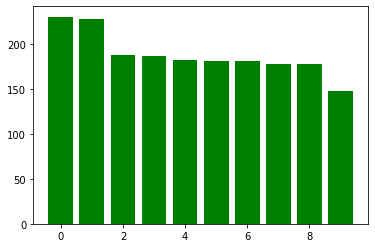

In [37]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
plt.bar(x_axis, mice_per_drug, color="green", align="center")
plt.bar

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [ ]:
# reset index
mouse_study.reset_index(level=0, inplace=True)